In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split


In [2]:
df_train = pd.read_csv("fraudTrain.csv")
df_train.drop(df_train.columns[0], axis = 1, inplace = True)
pd.set_option('display.max_columns', None)
df_train.head(10)

trans_date_trans_time            cc_num  \
0   2020-06-21 12:14:25  2291163933867244   
1   2020-06-21 12:14:33  3573030041201292   
2   2020-06-21 12:14:53  3598215285024754   
3   2020-06-21 12:15:15  3591919803438423   
4   2020-06-21 12:15:17  3526826139003047   
5   2020-06-21 12:15:37    30407675418785   
6   2020-06-21 12:15:44   213180742685905   
7   2020-06-21 12:15:50  3589289942931264   
8   2020-06-21 12:16:10  3596357274378601   
9   2020-06-21 12:16:11  3546897637165774   

                               merchant        category     amt     first  \
0                 fraud_Kirlin and Sons   personal_care    2.86      Jeff   
1                  fraud_Sporer-Keebler   personal_care   29.84    Joanne   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness   41.28    Ashley   
3                     fraud_Haley Group        misc_pos   60.05     Brian   
4                 fraud_Johnston-Casper          travel    3.19    Nathan   
5                   fraud_Daugherty LLC       kids_pets   19.55  Danielle   
6                   fraud_Romaguera Ltd  health_fitness  133.93     Kayla   
7                     fraud_Reichel LLC   personal_care   10.37     Paula   
8     fraud_Goyette, Howell and Collier    shopping_pos    4.37     David   
9                   fraud_Kilback Group     food_dining   66.54     Kayla   

       last gender                       street          city state    zip  \
0   Elliott      M            351 Darlene Green      Columbia    SC  29209   
1  Williams      F             3638 Marsh Union       Altonah    UT  84002   
2     Lopez      F         9333 Valentine Point      Bellmore    NY  11710   
3  Williams      M  32941 Krystal Mill Apt. 552    Titusville    FL  32780   
4    Massey      M     5783 Evan Roads Apt. 465      Falmouth    MI  49632   
5     Evans      F   76752 David Lodge Apt. 064     Breesport    NY  14816   
6    Sutton      F              010 Weaver Land      Carlotta    CA  95528   
7   Estrada      F              350 Stacy Glens       Spencer    SD  57374   
8   Everett      M              4138 David Fall    Morrisdale    PA  16858   
9    Obrien      F   7921 Robert Port Suite 343  Prairie Hill    TX  76678   

       lat      long  city_pop                                    job  \
0  33.9659  -80.9355    333497                    Mechanical engineer   
1  40.3207 -110.4360       302                 Sales professional, IT   
2  40.6729  -73.5365     34496                      Librarian, public   
3  28.5697  -80.8191     54767                           Set designer   
4  44.2529  -85.0170      1126                     Furniture designer   
5  42.1939  -76.7361       520                        Psychotherapist   
6  40.5070 -123.9743      1139                Therapist, occupational   
7  43.7557  -97.5936       343  Development worker, international aid   
8  41.0001  -78.2357      3688                          Advice worker   
9  31.6591  -96.8094       263                              Barrister   

          dob                         trans_num   unix_time  merch_lat  \
0  1968-03-19  2da90c7d74bd46a0caf3777415b3ebd3  1371816865  33.986391   
1  1990-01-17  324cc204407e99f51b0d6ca0055005e7  1371816873  39.450498   
2  1970-10-21  c81755dbbbea9d5c77f094348a7579be  1371816893  40.495810   
3  1987-07-25  2159175b9efe66dc301f149d3d5abf8c  1371816915  28.812398   
4  1955-07-06  57ff021bd3f328f8738bb535c302a31b  1371816917  44.959148   
5  1991-10-13  798db04aaceb4febd084f1a7c404da93  1371816937  41.747157   
6  1951-01-15  17003d7ce534440eadb10c4750e020e5  1371816944  41.499458   
7  1972-03-05  8be473af4f05fc6146ea55ace73e7ca2  1371816950  44.495498   
8  1973-05-27  71a1da150d1ce510193d7622e08e784e  1371816970  41.546067   
9  1956-05-30  a7915132c7c4240996ba03a47f81e3bd  1371816971  31.782919   

   merch_long  is_fraud  
0  -81.200714         0  
1 -109.960431         0  
2  -74.196111         0  
3  -80.883061         0  
4  -85.884734         0  
5  -77.584197         0 

In [3]:
df_train.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [4]:
X = df_train.drop('is_fraud', axis = 1)
y = df_train['is_fraud']

In [5]:
X.rename(columns = {'trans_date_trans_time':'transaction_time', 'cc_num':'credit_card_number', 'amt':'amount', 'trans_num':'transaction_id'}, inplace = True)
X.columns

Index(['transaction_time', 'credit_card_number', 'merchant', 'category',
       'amount', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'transaction_id', 'unix_time',
       'merch_lat', 'merch_long'],
      dtype='object')

In [6]:
scaler = MinMaxScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   random_state = 0)
numerical_features = ['credit_card_number','amount','zip',
       'lat', 'long', 'city_pop', 'merch_lat', 'merch_long']

#Use fit_transform methode on X_train, so the model will learn from train dataset and the data will be normalised. 
X_train_scaled = scaler.fit_transform(X_train[numerical_features] )
#Use only transform methode on X_test, because the model should not learn from test dataset. 
#We only have to normalise this dataset. 
X_test_scaled = scaler.transform(X_test[numerical_features])

linlasso = Lasso().fit(X_train_scaled, y_train)
#max_iter to avoid converge warning. More leads to more computing time

print('Crime dataset')
print('lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linlasso.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X_test_scaled, y_test)))
print('Features with non-zero weight (sorted by absolute magnitude):')

for e in sorted (list(zip(list(X_train[numerical_features]), linlasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

Crime dataset
lasso regression linear model intercept: 0.0038316750202140653
lasso regression linear model coeff:
[-0.  0. -0.  0. -0. -0.  0. -0.]
Non-zero features: 0
R-squared score (training): 0.000
R-squared score (test): -0.000

Features with non-zero weight (sorted by absolute magnitude):


In [7]:

y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_fraud, dtype: int64

In [8]:
X = X.drop(columns = ["first", "last", "street", "unix_time"])
X.head()

transaction_time  credit_card_number  \
0  2020-06-21 12:14:25    2291163933867244   
1  2020-06-21 12:14:33    3573030041201292   
2  2020-06-21 12:14:53    3598215285024754   
3  2020-06-21 12:15:15    3591919803438423   
4  2020-06-21 12:15:17    3526826139003047   

                               merchant        category  amount gender  \
0                 fraud_Kirlin and Sons   personal_care    2.86      M   
1                  fraud_Sporer-Keebler   personal_care   29.84      F   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness   41.28      F   
3                     fraud_Haley Group        misc_pos   60.05      M   
4                 fraud_Johnston-Casper          travel    3.19      M   

         city state    zip      lat      long  city_pop  \
0    Columbia    SC  29209  33.9659  -80.9355    333497   
1     Altonah    UT  84002  40.3207 -110.4360       302   
2    Bellmore    NY  11710  40.6729  -73.5365     34496   
3  Titusville    FL  32780  28.5697  -80.8191     54767   
4    Falmouth    MI  49632  44.2529  -85.0170      1126   

                      job         dob                    transaction_id  \
0     Mechanical engineer  1968-03-19  2da90c7d74bd46a0caf3777415b3ebd3   
1  Sales professional, IT  1990-01-17  324cc204407e99f51b0d6ca0055005e7   
2       Librarian, public  1970-10-21  c81755dbbbea9d5c77f094348a7579be   
3            Set designer  1987-07-25  2159175b9efe66dc301f149d3d5abf8c   
4      Furniture designer  1955-07-06  57ff021bd3f328f8738bb535c302a31b   

   merch_lat  merch_long  
0  33.986391  -81.200714  
1  39.450498 -109.960431  
2  40.495810  -74.196111  
3  28.812398  -80.883061  
4  44.959148  -85.884734

In [9]:
# convert Date and Time to Unix timestamps

from datetime import timezone
import datetime

X['unix_time'] = X['transaction_time'].apply(lambda x: datetime.datetime.strptime(x,"%Y-%m-%d %H:%M:%S").replace(tzinfo=timezone.utc).timestamp())
X['unix_time'] = X['unix_time'].apply(np.int64)

In [10]:
X

transaction_time  credit_card_number  \
0       2020-06-21 12:14:25    2291163933867244   
1       2020-06-21 12:14:33    3573030041201292   
2       2020-06-21 12:14:53    3598215285024754   
3       2020-06-21 12:15:15    3591919803438423   
4       2020-06-21 12:15:17    3526826139003047   
...                     ...                 ...   
555714  2020-12-31 23:59:07      30560609640617   
555715  2020-12-31 23:59:09    3556613125071656   
555716  2020-12-31 23:59:15    6011724471098086   
555717  2020-12-31 23:59:24       4079773899158   
555718  2020-12-31 23:59:34    4170689372027579   

                                    merchant        category  amount gender  \
0                      fraud_Kirlin and Sons   personal_care    2.86      M   
1                       fraud_Sporer-Keebler   personal_care   29.84      F   
2       fraud_Swaniawski, Nitzsche and Welch  health_fitness   41.28      F   
3                          fraud_Haley Group        misc_pos   60.05      M   
4                      fraud_Johnston-Casper          travel    3.19      M   
...                                      ...             ...     ...    ...   
555714                 fraud_Reilly and Sons  health_fitness   43.77      M   
555715                  fraud_Hoppe-Parisian       kids_pets  111.84      M   
555716                       fraud_Rau-Robel       kids_pets   86.88      F   
555717                 fraud_Breitenberg LLC          travel    7.99      M   
555718                     fraud_Dare-Marvin   entertainment   38.13      M   

                city state    zip      lat      long  city_pop  \
0           Columbia    SC  29209  33.9659  -80.9355    333497   
1            Altonah    UT  84002  40.3207 -110.4360       302   
2           Bellmore    NY  11710  40.6729  -73.5365     34496   
3         Titusville    FL  32780  28.5697  -80.8191     54767   
4           Falmouth    MI  49632  44.2529  -85.0170      1126   
...              ...   ...    ...      ...       ...       ...   
555714         Luray    MO  63453  40.4931  -91.8912       519   
555715  Lake Jackson    TX  77566  29.0393  -95.4401     28739   
555716       Burbank    WA  99323  46.1966 -118.9017      3684   
555717          Mesa    ID  83643  44.6255 -116.4493       129   
555718        Edmond    OK  73034  35.6665  -97.4798    116001   

                           job         dob                    transaction_id  \
0          Mechanical engineer  1968-03-19  2da90c7d74bd46a0caf3777415b3ebd3   
1       Sales professional, IT  1990-01-17  324cc204407e99f51b0d6ca0055005e7   
2            Librarian, public  1970-10-21  c81755dbbbea9d5c77f094348a7579be   
3                 Set designer  1987-07-25  2159175b9efe66dc301f149d3d5abf8c   
4           Furniture designer  1955-07-06  57ff021bd3f328f8738bb535c302a31b   
...                        ...         ...                               ...   
555714            Town planner  1966-02-13  9b1f753c79894c9f4b71f04581835ada   
555715          Futures trader  1999-12-27  2090647dac2c89a1d86c514c427f5b91   
555716                Musician  1981-11-29  6c5b7c8add471975aa0fec023b2e8408   
555717            Cartographer  1965-12-15  14392d723bb7737606b2700ac791b7aa   
555718             Media buyer  1993-05-10  1765bb45b3aa3224b4cdcb6e7a96cee3   

        merch_lat  merch_long   unix_time  
0       33.986391  -81.200714  1592741665  
1       39.450498 -109.960431  1592741673  
2       40.495810  -74.196111  1592741693  
3       28.812398  -80.883061  1592741715  
4       44.959148  -85.884734  1592741717  
...           ...         ...         ...  
555714  39.946837  -91.333331  1609459147  
555715  29.661049  -96.186633  1609459149  
555716  46.658340 -119.715054  1609459155  
555717  44.470525 -117.080888  1609459164  
555718  36.210097  -97.036372  1609459174  

[555719 rows x 18 columns]

In [11]:
X['lat_difference'] = abs(X['lat'] - X['merch_lat'])
X['long_difference'] = abs(X['long'] - X['merch_long'])

X['distance'] = np.sqrt(pow((X['lat_difference']*111.32),2) + pow((X['long_difference']*111.32),2))
X['distance'].round(2)
X.head()

transaction_time  credit_card_number  \
0  2020-06-21 12:14:25    2291163933867244   
1  2020-06-21 12:14:33    3573030041201292   
2  2020-06-21 12:14:53    3598215285024754   
3  2020-06-21 12:15:15    3591919803438423   
4  2020-06-21 12:15:17    3526826139003047   

                               merchant        category  amount gender  \
0                 fraud_Kirlin and Sons   personal_care    2.86      M   
1                  fraud_Sporer-Keebler   personal_care   29.84      F   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness   41.28      F   
3                     fraud_Haley Group        misc_pos   60.05      M   
4                 fraud_Johnston-Casper          travel    3.19      M   

         city state    zip      lat      long  city_pop  \
0    Columbia    SC  29209  33.9659  -80.9355    333497   
1     Altonah    UT  84002  40.3207 -110.4360       302   
2    Bellmore    NY  11710  40.6729  -73.5365     34496   
3  Titusville    FL  32780  28.5697  -80.8191     54767   
4    Falmouth    MI  49632  44.2529  -85.0170      1126   

                      job         dob                    transaction_id  \
0     Mechanical engineer  1968-03-19  2da90c7d74bd46a0caf3777415b3ebd3   
1  Sales professional, IT  1990-01-17  324cc204407e99f51b0d6ca0055005e7   
2       Librarian, public  1970-10-21  c81755dbbbea9d5c77f094348a7579be   
3            Set designer  1987-07-25  2159175b9efe66dc301f149d3d5abf8c   
4      Furniture designer  1955-07-06  57ff021bd3f328f8738bb535c302a31b   

   merch_lat  merch_long   unix_time  lat_difference  long_difference  \
0  33.986391  -81.200714  1592741665        0.020491         0.265214   
1  39.450498 -109.960431  1592741673        0.870202         0.475569   
2  40.495810  -74.196111  1592741693        0.177090         0.659611   
3  28.812398  -80.883061  1592741715        0.242698         0.063961   
4  44.959148  -85.884734  1592741717        0.706248         0.867734   

     distance  
0   29.611611  
1  110.393154  
2   76.028181  
3   27.939619  
4  124.546562

In [12]:

X = X.drop(columns = ["lat", "long", "merch_long", "merch_lat", "lat_difference", "long_difference"])
X.head()

transaction_time  credit_card_number  \
0  2020-06-21 12:14:25    2291163933867244   
1  2020-06-21 12:14:33    3573030041201292   
2  2020-06-21 12:14:53    3598215285024754   
3  2020-06-21 12:15:15    3591919803438423   
4  2020-06-21 12:15:17    3526826139003047   

                               merchant        category  amount gender  \
0                 fraud_Kirlin and Sons   personal_care    2.86      M   
1                  fraud_Sporer-Keebler   personal_care   29.84      F   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness   41.28      F   
3                     fraud_Haley Group        misc_pos   60.05      M   
4                 fraud_Johnston-Casper          travel    3.19      M   

         city state    zip  city_pop                     job         dob  \
0    Columbia    SC  29209    333497     Mechanical engineer  1968-03-19   
1     Altonah    UT  84002       302  Sales professional, IT  1990-01-17   
2    Bellmore    NY  11710     34496       Librarian, public  1970-10-21   
3  Titusville    FL  32780     54767            Set designer  1987-07-25   
4    Falmouth    MI  49632      1126      Furniture designer  1955-07-06   

                     transaction_id   unix_time    distance  
0  2da90c7d74bd46a0caf3777415b3ebd3  1592741665   29.611611  
1  324cc204407e99f51b0d6ca0055005e7  1592741673  110.393154  
2  c81755dbbbea9d5c77f094348a7579be  1592741693   76.028181  
3  2159175b9efe66dc301f149d3d5abf8c  1592741715   27.939619  
4  57ff021bd3f328f8738bb535c302a31b  1592741717  124.546562

In [13]:

# define a function of box plot
def plot_boxplot(df, ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()

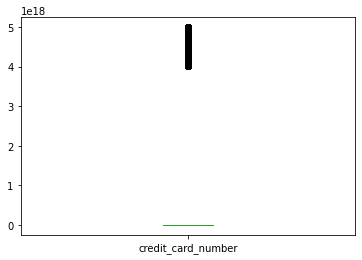

In [14]:
plot_boxplot(X, 'credit_card_number')

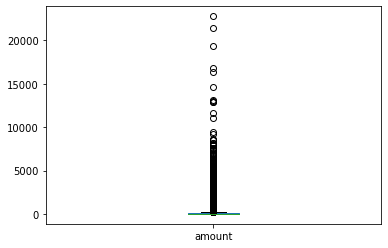

In [15]:
plot_boxplot(X, 'amount')

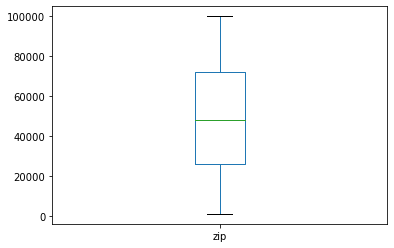

In [16]:

plot_boxplot(X, 'zip')

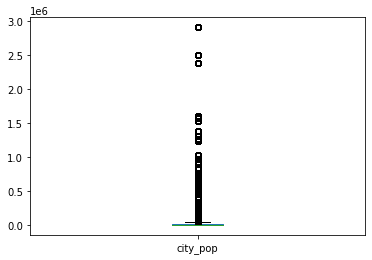

In [17]:

plot_boxplot(X, 'city_pop')

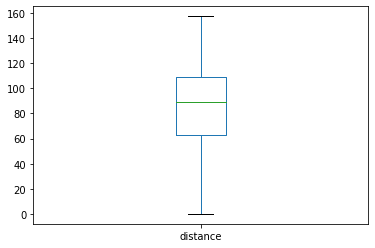

In [18]:

plot_boxplot(X, 'distance')

In [19]:
# define a function of removing outliers

def outliers(df, ft):
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1

    lower_boundary = Q1 - 1.5 * IQR
    upper_boundary = Q3 + 1.5 * IQR

    ls = df.index[(df[ft]<lower_boundary)|(df[ft]>upper_boundary)]

    return ls

In [20]:
index_list = []
for feature in ['zip','amount','distance']:
    index_list.extend(outliers(X, feature))

In [21]:
len(index_list)

27778

In [22]:
def remove(df, ls):
    ls = sorted(set(ls))
    df = df.drop(ls)
    return df

In [23]:
X_cleaned = remove(X,index_list)

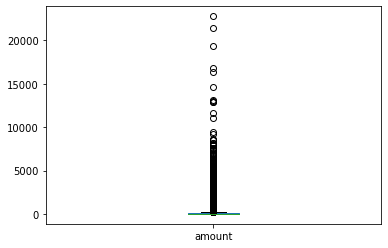

In [24]:
plot_boxplot(X, 'amount')

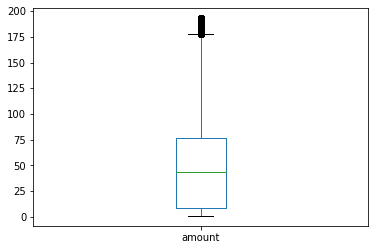

In [25]:
plot_boxplot(X_cleaned, 'amount')

In [26]:
X_cleaned.shape

(527941, 15)

In [27]:
X.shape

(555719, 15)

In [28]:
y_cleaned = remove(y, index_list)
y_cleaned.shape

(527941,)

In [29]:
y.shape

(555719,)

In [30]:
X_cleaned.reset_index(inplace=True)
X_cleaned.drop(columns={'index'},inplace=True)
X_cleaned

transaction_time  credit_card_number  \
0       2020-06-21 12:14:25    2291163933867244   
1       2020-06-21 12:14:33    3573030041201292   
2       2020-06-21 12:14:53    3598215285024754   
3       2020-06-21 12:15:15    3591919803438423   
4       2020-06-21 12:15:17    3526826139003047   
...                     ...                 ...   
527936  2020-12-31 23:59:07      30560609640617   
527937  2020-12-31 23:59:09    3556613125071656   
527938  2020-12-31 23:59:15    6011724471098086   
527939  2020-12-31 23:59:24       4079773899158   
527940  2020-12-31 23:59:34    4170689372027579   

                                    merchant        category  amount gender  \
0                      fraud_Kirlin and Sons   personal_care    2.86      M   
1                       fraud_Sporer-Keebler   personal_care   29.84      F   
2       fraud_Swaniawski, Nitzsche and Welch  health_fitness   41.28      F   
3                          fraud_Haley Group        misc_pos   60.05      M   
4                      fraud_Johnston-Casper          travel    3.19      M   
...                                      ...             ...     ...    ...   
527936                 fraud_Reilly and Sons  health_fitness   43.77      M   
527937                  fraud_Hoppe-Parisian       kids_pets  111.84      M   
527938                       fraud_Rau-Robel       kids_pets   86.88      F   
527939                 fraud_Breitenberg LLC          travel    7.99      M   
527940                     fraud_Dare-Marvin   entertainment   38.13      M   

                city state    zip  city_pop                     job  \
0           Columbia    SC  29209    333497     Mechanical engineer   
1            Altonah    UT  84002       302  Sales professional, IT   
2           Bellmore    NY  11710     34496       Librarian, public   
3         Titusville    FL  32780     54767            Set designer   
4           Falmouth    MI  49632      1126      Furniture designer   
...              ...   ...    ...       ...                     ...   
527936         Luray    MO  63453       519            Town planner   
527937  Lake Jackson    TX  77566     28739          Futures trader   
527938       Burbank    WA  99323      3684                Musician   
527939          Mesa    ID  83643       129            Cartographer   
527940        Edmond    OK  73034    116001             Media buyer   

               dob                    transaction_id   unix_time    distance  
0       1968-03-19  2da90c7d74bd46a0caf3777415b3ebd3  1592741665   29.611611  
1       1990-01-17  324cc204407e99f51b0d6ca0055005e7  1592741673  110.393154  
2       1970-10-21  c81755dbbbea9d5c77f094348a7579be  1592741693   76.028181  
3       1987-07-25  2159175b9efe66dc301f149d3d5abf8c  1592741715   27.939619  
4       1955-07-06  57ff021bd3f328f8738bb535c302a31b  1592741717  124.546562  
...            ...                               ...         ...         ...  
527936  1966-02-13  9b1f753c79894c9f4b71f04581835ada  1609459147   86.916692  
527937  1999-12-27  2090647dac2c89a1d86c514c427f5b91  1609459149  108.151453  
527938  1981-11-29  6c5b7c8add471975aa0fec023b2e8408  1609459155  104.115362  
527939  1965-12-15  14392d723bb7737606b2700ac791b7aa  1609459164   72.394012  
527940  1993-05-10  1765bb45b3aa3224b4cdcb6e7a96cee3  1609459174   78.092872  

[527941 rows x 15 columns]

In [31]:
y_cleaned.reset_index(drop=True,inplace=True)

In [32]:
# Mias task
X_cleaned.head()

transaction_time  credit_card_number  \
0  2020-06-21 12:14:25    2291163933867244   
1  2020-06-21 12:14:33    3573030041201292   
2  2020-06-21 12:14:53    3598215285024754   
3  2020-06-21 12:15:15    3591919803438423   
4  2020-06-21 12:15:17    3526826139003047   

                               merchant        category  amount gender  \
0                 fraud_Kirlin and Sons   personal_care    2.86      M   
1                  fraud_Sporer-Keebler   personal_care   29.84      F   
2  fraud_Swaniawski, Nitzsche and Welch  health_fitness   41.28      F   
3                     fraud_Haley Group        misc_pos   60.05      M   
4                 fraud_Johnston-Casper          travel    3.19      M   

         city state    zip  city_pop                     job         dob  \
0    Columbia    SC  29209    333497     Mechanical engineer  1968-03-19   
1     Altonah    UT  84002       302  Sales professional, IT  1990-01-17   
2    Bellmore    NY  11710     34496       Librarian, public  1970-10-21   
3  Titusville    FL  32780     54767            Set designer  1987-07-25   
4    Falmouth    MI  49632      1126      Furniture designer  1955-07-06   

                     transaction_id   unix_time    distance  
0  2da90c7d74bd46a0caf3777415b3ebd3  1592741665   29.611611  
1  324cc204407e99f51b0d6ca0055005e7  1592741673  110.393154  
2  c81755dbbbea9d5c77f094348a7579be  1592741693   76.028181  
3  2159175b9efe66dc301f149d3d5abf8c  1592741715   27.939619  
4  57ff021bd3f328f8738bb535c302a31b  1592741717  124.546562

In [33]:
y_cleaned.head()

0    0
1    0
2    0
3    0
4    0
Name: is_fraud, dtype: int64

In [34]:
X_cleaned.dtypes

transaction_time       object
credit_card_number      int64
merchant               object
category               object
amount                float64
gender                 object
city                   object
state                  object
zip                     int64
city_pop                int64
job                    object
dob                    object
transaction_id         object
unix_time               int64
distance              float64
dtype: object

In [35]:
y_cleaned.dtypes

dtype('int64')

In [36]:
#now, I am going to include only the object columns in our dataframe
obj_df = X_cleaned.select_dtypes(include=['object']).copy()
obj_df.head()

transaction_time                              merchant        category  \
0  2020-06-21 12:14:25                 fraud_Kirlin and Sons   personal_care   
1  2020-06-21 12:14:33                  fraud_Sporer-Keebler   personal_care   
2  2020-06-21 12:14:53  fraud_Swaniawski, Nitzsche and Welch  health_fitness   
3  2020-06-21 12:15:15                     fraud_Haley Group        misc_pos   
4  2020-06-21 12:15:17                 fraud_Johnston-Casper          travel   

  gender        city state                     job         dob  \
0      M    Columbia    SC     Mechanical engineer  1968-03-19   
1      F     Altonah    UT  Sales professional, IT  1990-01-17   
2      F    Bellmore    NY       Librarian, public  1970-10-21   
3      M  Titusville    FL            Set designer  1987-07-25   
4      M    Falmouth    MI      Furniture designer  1955-07-06   

                     transaction_id  
0  2da90c7d74bd46a0caf3777415b3ebd3  
1  324cc204407e99f51b0d6ca0055005e7  
2  c81755dbbbea9d5c77f094348a7579be  
3  2159175b9efe66dc301f149d3d5abf8c  
4  57ff021bd3f328f8738bb535c302a31b

In [37]:
#check if there is missing data
obj_df.isna().sum()

transaction_time    0
merchant            0
category            0
gender              0
city                0
state               0
job                 0
dob                 0
transaction_id      0
dtype: int64

In [38]:
#Label Encoding
#Encoding, Replace categorical data with number
data_category = X_cleaned.select_dtypes(exclude=[np.number])

In [39]:
data_category.head()

transaction_time                              merchant        category  \
0  2020-06-21 12:14:25                 fraud_Kirlin and Sons   personal_care   
1  2020-06-21 12:14:33                  fraud_Sporer-Keebler   personal_care   
2  2020-06-21 12:14:53  fraud_Swaniawski, Nitzsche and Welch  health_fitness   
3  2020-06-21 12:15:15                     fraud_Haley Group        misc_pos   
4  2020-06-21 12:15:17                 fraud_Johnston-Casper          travel   

  gender        city state                     job         dob  \
0      M    Columbia    SC     Mechanical engineer  1968-03-19   
1      F     Altonah    UT  Sales professional, IT  1990-01-17   
2      F    Bellmore    NY       Librarian, public  1970-10-21   
3      M  Titusville    FL            Set designer  1987-07-25   
4      M    Falmouth    MI      Furniture designer  1955-07-06   

                     transaction_id  
0  2da90c7d74bd46a0caf3777415b3ebd3  
1  324cc204407e99f51b0d6ca0055005e7  
2  c81755dbbbea9d5c77f094348a7579be  
3  2159175b9efe66dc301f149d3d5abf8c  
4  57ff021bd3f328f8738bb535c302a31b

In [40]:
## Lets take one categorical column "city" and see the unique categorical values in it, so that we could replace it with numerical value
data_category['city'].unique()

array(['Columbia', 'Altonah', 'Bellmore', 'Titusville', 'Falmouth',
       'Breesport', 'Carlotta', 'Spencer', 'Morrisdale', 'Prairie Hill',
       'Westport', 'Fort Washakie', 'Loxahatchee', 'Rock Tavern', 'Jones',
       'Deltona', 'Key West', 'Grandview', 'Saint Amant', 'Clarks Mills',
       'Alpharetta', 'Colorado Springs', 'Greenville', 'Tomahawk',
       'Goodrich', 'Daly City', 'South Londonderry', 'Lepanto',
       'New Waverly', 'New York City', 'Pewee Valley', 'Plainfield',
       'Belmond', 'Manchester', 'Sontag', 'Hawthorne', 'Gadsden',
       'Birmingham', 'Ollie', 'Baton Rouge', 'San Antonio', 'Southfield',
       'Mc Cracken', 'Purmela', 'Lomax', 'Tuscarora', 'Sunflower',
       'Ogdensburg', 'Redford', 'Brooklin', 'Fields Landing',
       'Rocky Mount', 'Port Saint Lucie', 'Graniteville', 'Tiptonville',
       'Washington', 'Clearwater', 'Brooklyn', 'Superior', 'Glendale',
       'Hudson', 'Rock Springs', 'Hurley', 'Fort Myers', 'Turner',
       'Smiths Grove', 'Elizab

In [41]:
#Find the frequency distribution of each categorical column. To do so, use the value_counts() function on each column. This function returns the counts of unique values in an object
data_category.city.value_counts()

Birmingham     2336
Utica          2133
San Antonio    2119
Phoenix        2028
Meridian       1951
               ... 
Kirkwood          1
Seattle           1
Wever             1
Craig             1
Lexington         1
Name: city, Length: 848, dtype: int64

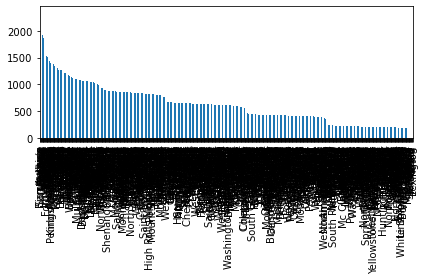

In [42]:
fig=X_cleaned['city'].value_counts().plot.bar().get_figure()
fig.tight_layout()

In [43]:
#dataframe with categorical data
data_category = X_cleaned.select_dtypes(exclude=[np.number]).columns

In [44]:
data_category

Index(['transaction_time', 'merchant', 'category', 'gender', 'city', 'state',
       'job', 'dob', 'transaction_id'],
      dtype='object')

In [45]:
X_cleaned[data_category].head()

transaction_time                              merchant        category  \
0  2020-06-21 12:14:25                 fraud_Kirlin and Sons   personal_care   
1  2020-06-21 12:14:33                  fraud_Sporer-Keebler   personal_care   
2  2020-06-21 12:14:53  fraud_Swaniawski, Nitzsche and Welch  health_fitness   
3  2020-06-21 12:15:15                     fraud_Haley Group        misc_pos   
4  2020-06-21 12:15:17                 fraud_Johnston-Casper          travel   

  gender        city state                     job         dob  \
0      M    Columbia    SC     Mechanical engineer  1968-03-19   
1      F     Altonah    UT  Sales professional, IT  1990-01-17   
2      F    Bellmore    NY       Librarian, public  1970-10-21   
3      M  Titusville    FL            Set designer  1987-07-25   
4      M    Falmouth    MI      Furniture designer  1955-07-06   

                     transaction_id  
0  2da90c7d74bd46a0caf3777415b3ebd3  
1  324cc204407e99f51b0d6ca0055005e7  
2  c81755dbbbea9d5c77f094348a7579be  
3  2159175b9efe66dc301f149d3d5abf8c  
4  57ff021bd3f328f8738bb535c302a31b

In [46]:
from sklearn.preprocessing import LabelEncoder

# Creating the object instance for label encoder

label_encoder = LabelEncoder()
for i in data_category:
    X_cleaned[i] = label_encoder.fit_transform(X_cleaned[i])
X_cleaned.head()

transaction_time  credit_card_number  merchant  category  amount  gender  \
0                 0    2291163933867244       319        10    2.86       1   
1                 1    3573030041201292       591        10   29.84       0   
2                 2    3598215285024754       611         5   41.28       0   
3                 3    3591919803438423       222         9   60.05       1   
4                 4    3526826139003047       292        13    3.19       1   

   city  state    zip  city_pop  job  dob  transaction_id   unix_time  \
0   157     39  29209    333497  275  375           93729  1592741665   
1    16     43  84002       302  392  759          103309  1592741673   
2    61     33  11710     34496  259  420          412227  1592741693   
3   763      8  32780     54767  407  717           68397  1592741715   
4   247     21  49632      1126  196  177          180951  1592741717   

     distance  
0   29.611611  
1  110.393154  
2   76.028181  
3   27.939619  
4  124.546562

In [47]:
X_cleaned.dtypes

transaction_time        int32
credit_card_number      int64
merchant                int32
category                int32
amount                float64
gender                  int32
city                    int32
state                   int32
zip                     int64
city_pop                int64
job                     int32
dob                     int32
transaction_id          int32
unix_time               int64
distance              float64
dtype: object

In [48]:
X_cleaned

transaction_time  credit_card_number  merchant  category  amount  \
0                      0    2291163933867244       319        10    2.86   
1                      1    3573030041201292       591        10   29.84   
2                      2    3598215285024754       611         5   41.28   
3                      3    3591919803438423       222         9   60.05   
4                      4    3526826139003047       292        13    3.19   
...                  ...                 ...       ...       ...     ...   
527936            518039      30560609640617       507         5   43.77   
527937            518040    3556613125071656       264         7  111.84   
527938            518041    6011724471098086       496         7   86.88   
527939            518042       4079773899158        75        13    7.99   
527940            518043    4170689372027579       125         0   38.13   

        gender  city  state    zip  city_pop  job  dob  transaction_id  \
0            1   157     39  29209    333497  275  375           93729   
1            0    16     43  84002       302  392  759          103309   
2            0    61     33  11710     34496  259  420          412227   
3            1   763      8  32780     54767  407  717           68397   
4            1   247     21  49632      1126  196  177          180951   
...        ...   ...    ...    ...       ...  ...  ...             ...   
527936       1   442     23  63453       519  460  333          319397   
527937       1   400     42  77566     28739  198  889           66858   
527938       0   104     46  99323      3684  294  608          223195   
527939       1   475     12  83643       129   58  330           41385   
527940       1   224     35  73034    116001  276  812           48072   

         unix_time    distance  
0       1592741665   29.611611  
1       1592741673  110.393154  
2       1592741693   76.028181  
3       1592741715   27.939619  
4       1592741717  124.546562  
...            ...         ...  
527936  1609459147   86.916692  
527937  1609459149  108.151453  
527938  1609459155  104.115362  
527939  1609459164   72.394012  
527940  1609459174   78.092872  

[527941 rows x 15 columns]

other features engineering: create new columns about datatime -- done by Shujiao

In [49]:
from datetime import datetime
X_cleaned['Date_Time'] = X_cleaned['unix_time'].apply(lambda x: datetime.utcfromtimestamp(x))
X_cleaned 

transaction_time  credit_card_number  merchant  category  amount  \
0                      0    2291163933867244       319        10    2.86   
1                      1    3573030041201292       591        10   29.84   
2                      2    3598215285024754       611         5   41.28   
3                      3    3591919803438423       222         9   60.05   
4                      4    3526826139003047       292        13    3.19   
...                  ...                 ...       ...       ...     ...   
527936            518039      30560609640617       507         5   43.77   
527937            518040    3556613125071656       264         7  111.84   
527938            518041    6011724471098086       496         7   86.88   
527939            518042       4079773899158        75        13    7.99   
527940            518043    4170689372027579       125         0   38.13   

        gender  city  state    zip  city_pop  job  dob  transaction_id  \
0            1   157     39  29209    333497  275  375           93729   
1            0    16     43  84002       302  392  759          103309   
2            0    61     33  11710     34496  259  420          412227   
3            1   763      8  32780     54767  407  717           68397   
4            1   247     21  49632      1126  196  177          180951   
...        ...   ...    ...    ...       ...  ...  ...             ...   
527936       1   442     23  63453       519  460  333          319397   
527937       1   400     42  77566     28739  198  889           66858   
527938       0   104     46  99323      3684  294  608          223195   
527939       1   475     12  83643       129   58  330           41385   
527940       1   224     35  73034    116001  276  812           48072   

         unix_time    distance           Date_Time  
0       1592741665   29.611611 2020-06-21 12:14:25  
1       1592741673  110.393154 2020-06-21 12:14:33  
2       1592741693   76.028181 2020-06-21 12:14:53  
3       1592741715   27.939619 2020-06-21 12:15:15  
4       1592741717  124.546562 2020-06-21 12:15:17  
...            ...         ...                 ...  
527936  1609459147   86.916692 2020-12-31 23:59:07  
527937  1609459149  108.151453 2020-12-31 23:59:09  
527938  1609459155  104.115362 2020-12-31 23:59:15  
527939  1609459164   72.394012 2020-12-31 23:59:24  
527940  1609459174   78.092872 2020-12-31 23:59:34  

[527941 rows x 16 columns]

In [50]:
X_cleaned['hour'] = X_cleaned['Date_Time'].dt.hour
X_cleaned['day'] = X_cleaned['Date_Time'].dt.weekday
X_cleaned

transaction_time  credit_card_number  merchant  category  amount  \
0                      0    2291163933867244       319        10    2.86   
1                      1    3573030041201292       591        10   29.84   
2                      2    3598215285024754       611         5   41.28   
3                      3    3591919803438423       222         9   60.05   
4                      4    3526826139003047       292        13    3.19   
...                  ...                 ...       ...       ...     ...   
527936            518039      30560609640617       507         5   43.77   
527937            518040    3556613125071656       264         7  111.84   
527938            518041    6011724471098086       496         7   86.88   
527939            518042       4079773899158        75        13    7.99   
527940            518043    4170689372027579       125         0   38.13   

        gender  city  state    zip  city_pop  job  dob  transaction_id  \
0            1   157     39  29209    333497  275  375           93729   
1            0    16     43  84002       302  392  759          103309   
2            0    61     33  11710     34496  259  420          412227   
3            1   763      8  32780     54767  407  717           68397   
4            1   247     21  49632      1126  196  177          180951   
...        ...   ...    ...    ...       ...  ...  ...             ...   
527936       1   442     23  63453       519  460  333          319397   
527937       1   400     42  77566     28739  198  889           66858   
527938       0   104     46  99323      3684  294  608          223195   
527939       1   475     12  83643       129   58  330           41385   
527940       1   224     35  73034    116001  276  812           48072   

         unix_time    distance           Date_Time  hour  day  
0       1592741665   29.611611 2020-06-21 12:14:25    12    6  
1       1592741673  110.393154 2020-06-21 12:14:33    12    6  
2       1592741693   76.028181 2020-06-21 12:14:53    12    6  
3       1592741715   27.939619 2020-06-21 12:15:15    12    6  
4       1592741717  124.546562 2020-06-21 12:15:17    12    6  
...            ...         ...                 ...   ...  ...  
527936  1609459147   86.916692 2020-12-31 23:59:07    23    3  
527937  1609459149  108.151453 2020-12-31 23:59:09    23    3  
527938  1609459155  104.115362 2020-12-31 23:59:15    23    3  
527939  1609459164   72.394012 2020-12-31 23:59:24    23    3  
527940  1609459174   78.092872 2020-12-31 23:59:34    23    3  

[527941 rows x 18 columns]

In [51]:
X_cleaned['weekend']= np.where(X_cleaned['day'].isin([5,6]),1,0)
X_cleaned.drop(columns={'Date_Time'},inplace=True)
X_cleaned

transaction_time  credit_card_number  merchant  category  amount  \
0                      0    2291163933867244       319        10    2.86   
1                      1    3573030041201292       591        10   29.84   
2                      2    3598215285024754       611         5   41.28   
3                      3    3591919803438423       222         9   60.05   
4                      4    3526826139003047       292        13    3.19   
...                  ...                 ...       ...       ...     ...   
527936            518039      30560609640617       507         5   43.77   
527937            518040    3556613125071656       264         7  111.84   
527938            518041    6011724471098086       496         7   86.88   
527939            518042       4079773899158        75        13    7.99   
527940            518043    4170689372027579       125         0   38.13   

        gender  city  state    zip  city_pop  job  dob  transaction_id  \
0            1   157     39  29209    333497  275  375           93729   
1            0    16     43  84002       302  392  759          103309   
2            0    61     33  11710     34496  259  420          412227   
3            1   763      8  32780     54767  407  717           68397   
4            1   247     21  49632      1126  196  177          180951   
...        ...   ...    ...    ...       ...  ...  ...             ...   
527936       1   442     23  63453       519  460  333          319397   
527937       1   400     42  77566     28739  198  889           66858   
527938       0   104     46  99323      3684  294  608          223195   
527939       1   475     12  83643       129   58  330           41385   
527940       1   224     35  73034    116001  276  812           48072   

         unix_time    distance  hour  day  weekend  
0       1592741665   29.611611    12    6        1  
1       1592741673  110.393154    12    6        1  
2       1592741693   76.028181    12    6        1  
3       1592741715   27.939619    12    6        1  
4       1592741717  124.546562    12    6        1  
...            ...         ...   ...  ...      ...  
527936  1609459147   86.916692    23    3        0  
527937  1609459149  108.151453    23    3        0  
527938  1609459155  104.115362    23    3        0  
527939  1609459164   72.394012    23    3        0  
527940  1609459174   78.092872    23    3        0  

[527941 rows x 18 columns]

In [52]:
# Maxs task

from imblearn.over_sampling import SMOTE

y_cleaned.value_counts().to_frame().T

from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(X_cleaned, y_cleaned)
y_resampled.value_counts().to_frame().T 

0       1
is_fraud  527409  527409

In [53]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sn

from sklearn.metrics import confusion_matrix
from statsmodels.graphics.mosaicplot import mosaic

from sklearn.datasets import make_classification
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import matthews_corrcoef

def get_acc_and_F1(ratio):
    # create the synthetic dataset
    X_cleaned, y_cleaned = make_classification(n_samples=25000, 
                            n_features=20, 
                            n_informative=2, 
                            n_redundant=2, 
                            n_repeated=0, 
                            n_classes=2, 
                            n_clusters_per_class=2, 
                            weights=[ratio, 1-ratio], 
                            flip_y=0.01, 
                            class_sep=1.0, 
                            hypercube=True, 
                            shift=0.0, 
                            scale=1.0, 
                            shuffle=True, 
                            random_state=42)

                        

In [54]:
X_cleaned, y_cleaned = make_classification(n_samples=1000, 
                            n_classes=2,
                            n_features=2,
                            n_informative=2, 
                            n_redundant=0, 
                            n_repeated=0,
                            weights=[0.99, 1-0.99],
                            class_sep=0.3,
                            random_state=2)

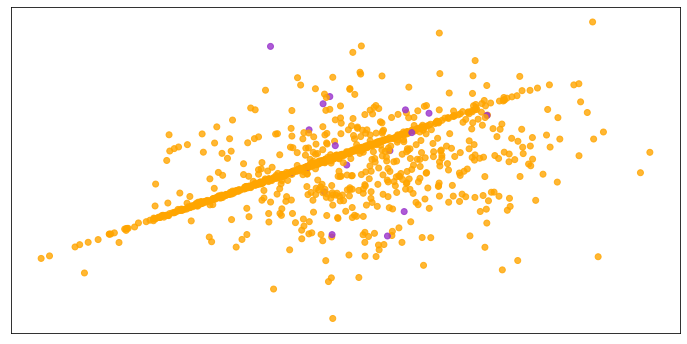

In [55]:
# define the colours to use
my_cmap = matplotlib.colors.ListedColormap(['orange', 'darkorchid'])
# now make a scatter plot
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
plt.scatter(X_cleaned[:, 0], X_cleaned[:, 1], c=y_cleaned, cmap=my_cmap, alpha=0.8)
# hide the labels
plt.xticks([])
plt.yticks([])
plt.show();

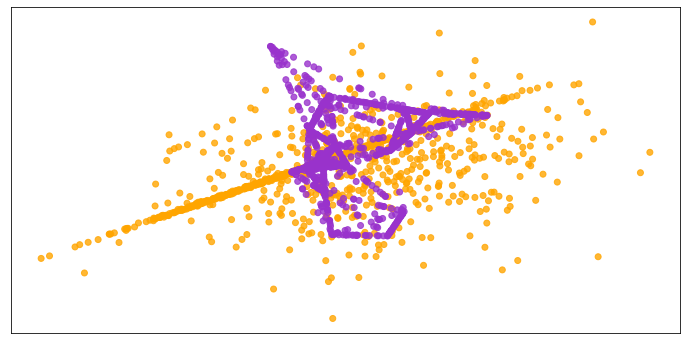

In [56]:
# SMOTE PLOT 
X_resampled, y_resampled = SMOTE().fit_resample(X_cleaned, y_cleaned)
# plot
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=y_resampled, cmap=my_cmap, alpha=0.8)
plt.xticks([])
plt.yticks([])
plt.show();




In [57]:
len(X_resampled)

1964

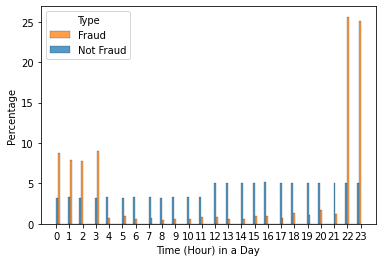

In [60]:
#Visualization

#Daytime, where fraud happens
df_train['hour']=pd.to_datetime(df_train['trans_date_trans_time']).dt.hour
ax=sns.histplot(data=df_train, x="hour", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge')
ax.set_ylabel('Percentage')
ax.set_xlabel('Time (Hour) in a Day')
plt.xticks(np.arange(0,24,1))
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

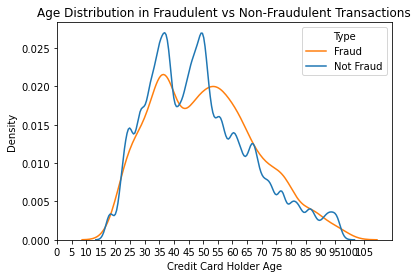

In [62]:
#Age of person & fraudulent/not fraudulent

import datetime as dt
df_train['age']=dt.date.today().year-pd.to_datetime(df_train['dob']).dt.year
ax=sns.kdeplot(x='age',data=df_train, hue='is_fraud', common_norm=False)
ax.set_xlabel('Credit Card Holder Age')
ax.set_ylabel('Density')
plt.xticks(np.arange(0,110,5))
plt.title('Age Distribution in Fraudulent vs Non-Fraudulent Transactions')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

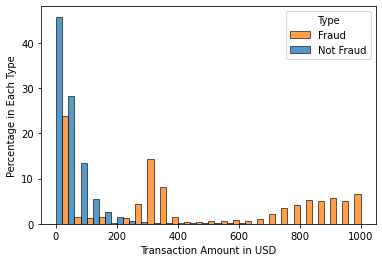

In [64]:
#Distribution of amount of fraudulent transactions

ax=sns.histplot(x='amt',data=df_train[df_train.amt<=1000],hue='is_fraud',stat='percent',multiple='dodge',common_norm=False,bins=25)
ax.set_ylabel('Percentage in Each Type')
ax.set_xlabel('Transaction Amount in USD')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

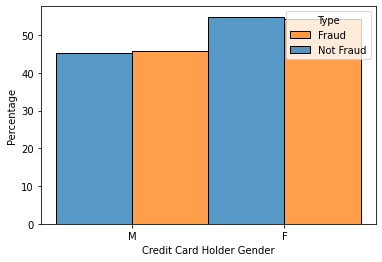

In [66]:
#Comparison of male vs female transactions

ax=sns.histplot(x='gender',data=df_train, hue='is_fraud',stat='percent',multiple='dodge',common_norm=False)
ax.set_ylabel('Percentage')
ax.set_xlabel('Credit Card Holder Gender')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

C:\Users\Max\AppData\Local\Temp/ipykernel_15980/386772638.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['',"Mon","Tue","Wed","Thu","Fri","Sat","Sun"])


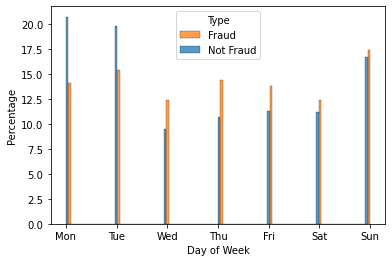

In [68]:
#Distribution of weekdays

df_train['day']=pd.to_datetime(df_train['trans_date_trans_time']).dt.dayofweek
ax=sns.histplot(data=df_train, x="day", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge')
ax.set_xticklabels(['',"Mon","Tue","Wed","Thu","Fri","Sat","Sun"])
ax.set_ylabel('Percentage')
ax.set_xlabel('Day of Week')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

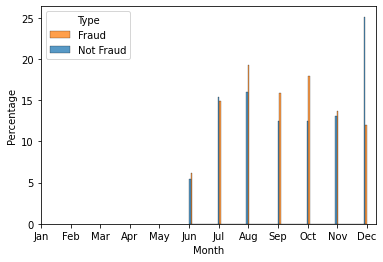

In [69]:
#Distribution of months

df_train['month']=pd.to_datetime(df_train['trans_date_trans_time']).dt.month
ax=sns.histplot(data=df_train, x="month", hue="is_fraud", common_norm=False,stat='percent',multiple='dodge')
ax.set_ylabel('Percentage')
ax.set_xlabel('Month')
plt.xticks(np.arange(1,13,1))
ax.set_xticklabels(["Jan","Feb","Mar","Apr","May","Jun","Jul",'Aug','Sep','Oct','Nov','Dec'])
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])